# Importing the Dependencies

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection & Analysis

In [193]:
# loading the data from csv file to a pandas dataframe
insurance_dataset = pd.read_csv('new csv/insurance.csv')

In [194]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [195]:
# numbers of rows & columns
insurance_dataset.shape

(1338, 7)

In [196]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical Features:
#### * Sex
#### * Smoker
#### * Region

In [198]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [200]:
# statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [201]:
insurance_dataset.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<Figure size 600x600 with 0 Axes>

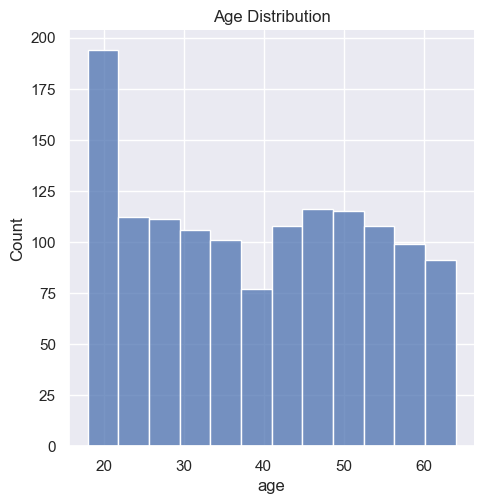

In [202]:
# distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/259033507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_dataset, palette='Set1')


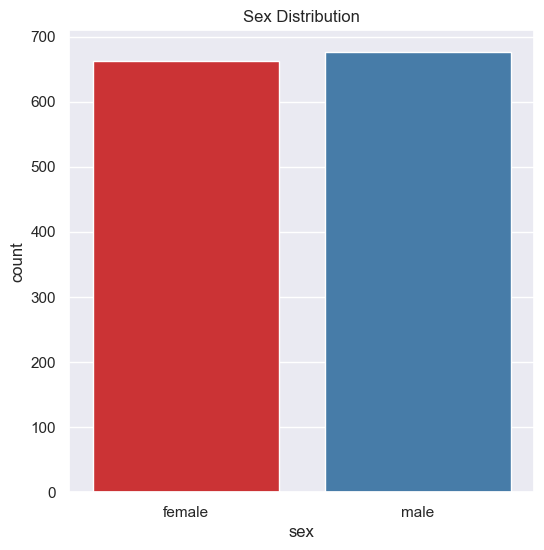

In [203]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset, palette='Set1')
plt.title('Sex Distribution')
plt.show()

In [204]:
insurance_dataset['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object>

<Figure size 600x600 with 0 Axes>

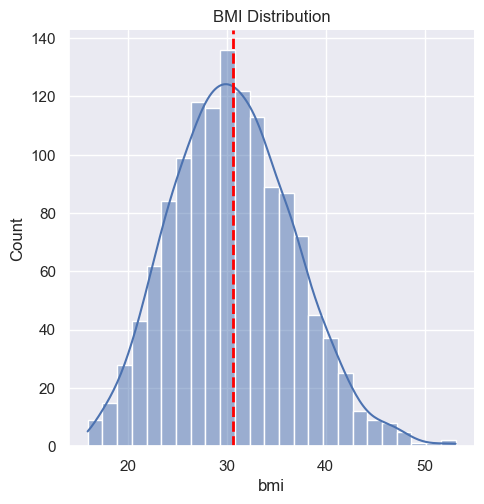

In [205]:
# bmi distribution
mean_bmi = insurance_dataset['bmi'].mean()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'], kde=True)
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_bmi:.2f}')
plt.title('BMI Distribution')
plt.show()

/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/2056325373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=insurance_dataset, palette='Set3')


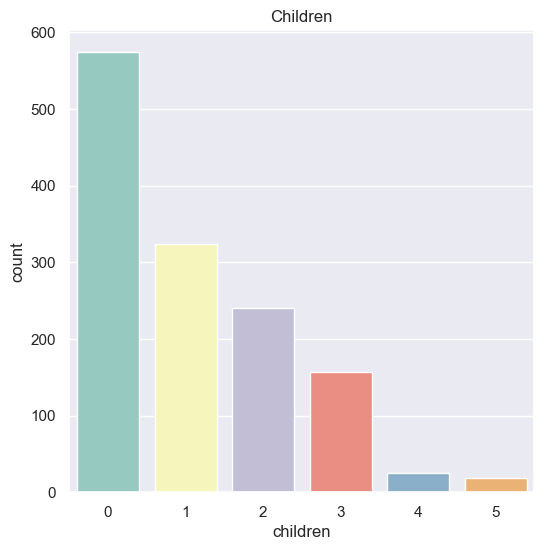

In [206]:
# number of children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset, palette='Set3')
plt.title('Children')
plt.show()

/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/1567680252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_dataset, palette='Set1')


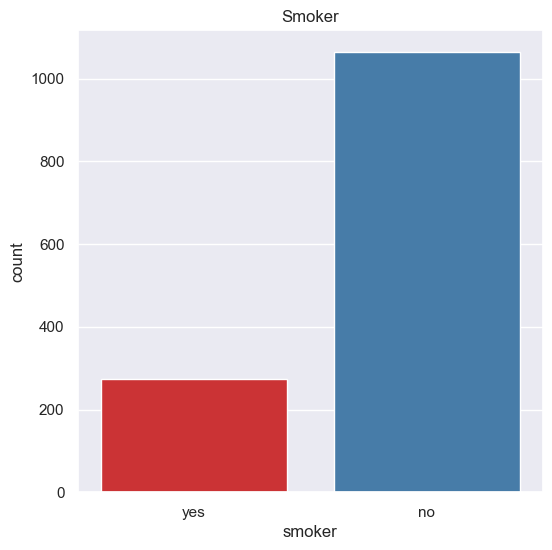

In [207]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset, palette='Set1')
plt.title('Smoker')
plt.show()

In [208]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/3798323305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=insurance_dataset, palette='Set2')


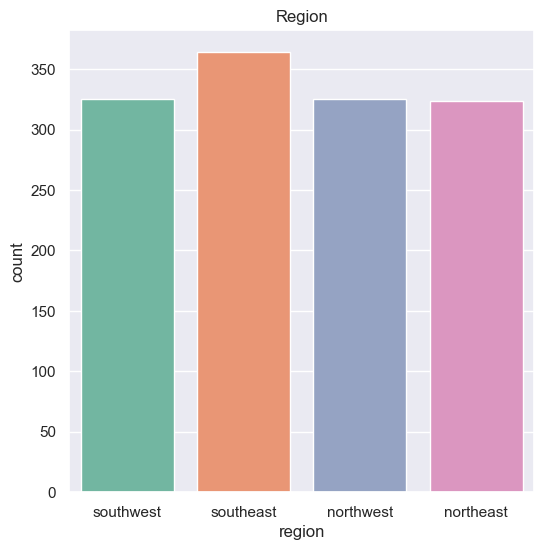

In [209]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset, palette='Set2')
plt.title('Region')
plt.show()

In [210]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

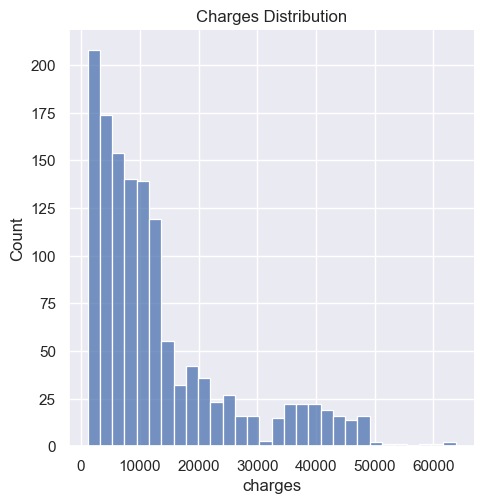

In [211]:
# distribution of charges values
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Precessing
## Encoding the Categorical Features

In [213]:
insurance_dataset.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [214]:
insurance_dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [215]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'no':1, 'yes':0}}, inplace=True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/214894933.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/214894933.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'no':1, 'yes':0}}, inplace=True)
/var/folders/v0/6l94_r9s3hs_kf6qmtn5k0rr0000gn/T/ipykernel_3924/214894933.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated

In [216]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting the Features & Target

In [218]:
X = insurance_dataset.drop('charges', axis=1)
Y = insurance_dataset['charges']

In [219]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into Training data & Test data

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [222]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training -> Linear Regression

In [224]:
# loading the linear regression model
regressor = LinearRegression()

In [225]:
regressor.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation 

In [227]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(training_data_prediction, Y_train)

In [228]:
print('R squared value :', r2_train)

R squared value : 0.6693380032904611


In [229]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(test_data_prediction, Y_test)

In [230]:
print('R squared value :', r2_test)

R squared value : 0.6606659986058929


# Building a Predictive System

In [232]:
input_data = (31,1,25.74,0,1,0)

# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is '+ str(prediction) + 'USD')

[27493.78572712]
The insurance cost is [27493.78572712]USD


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
